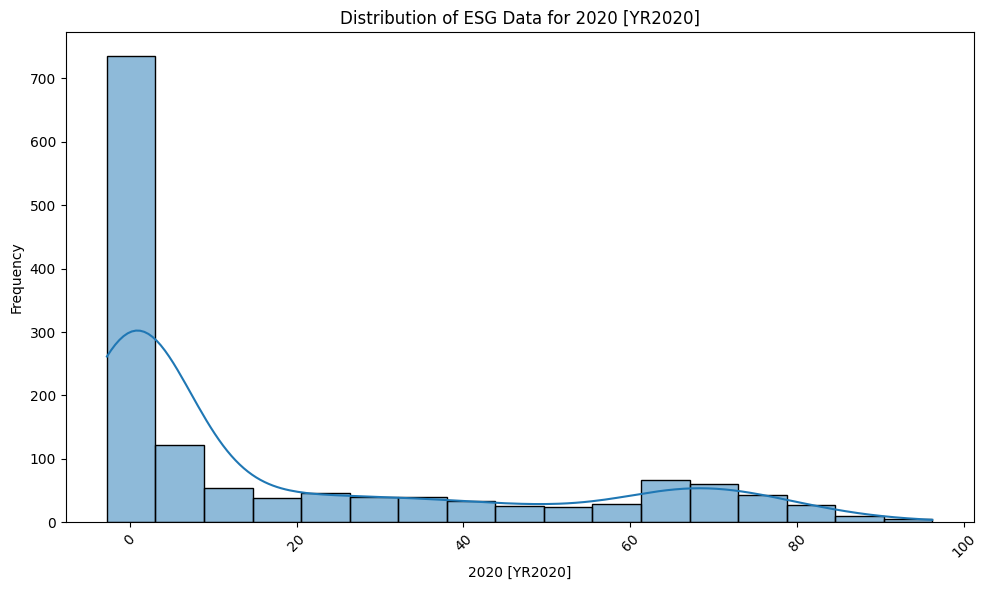

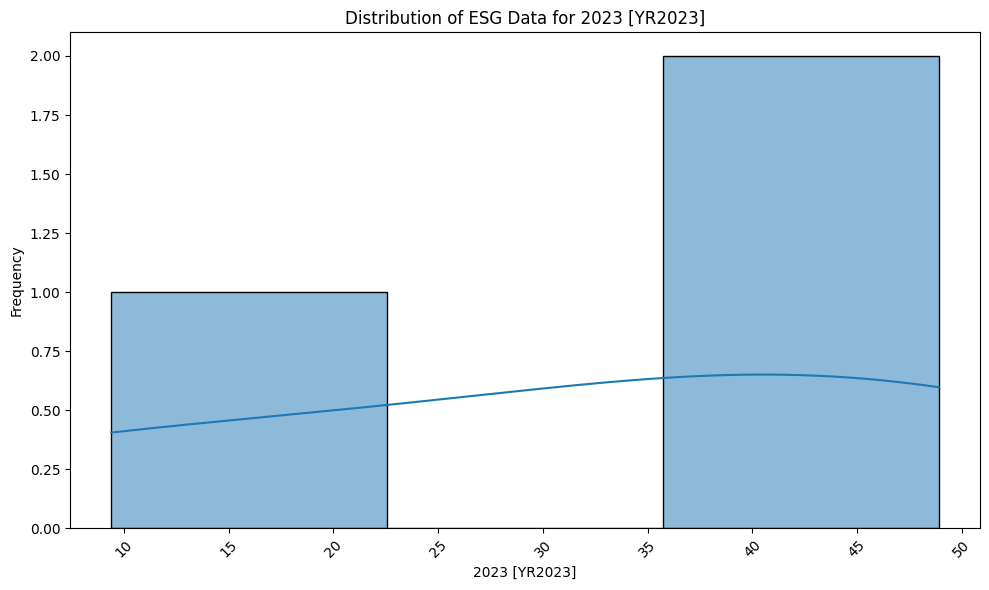

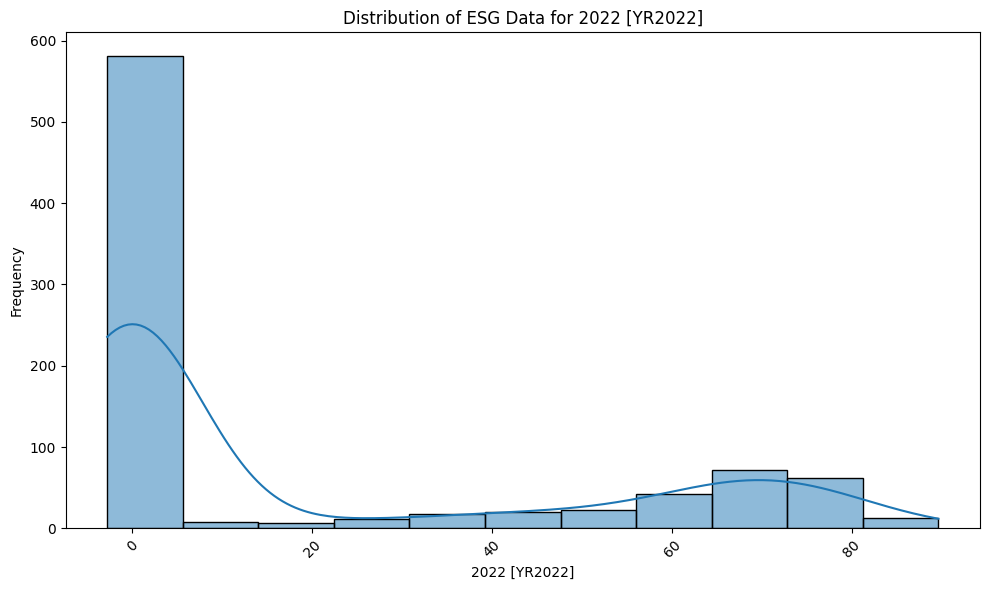

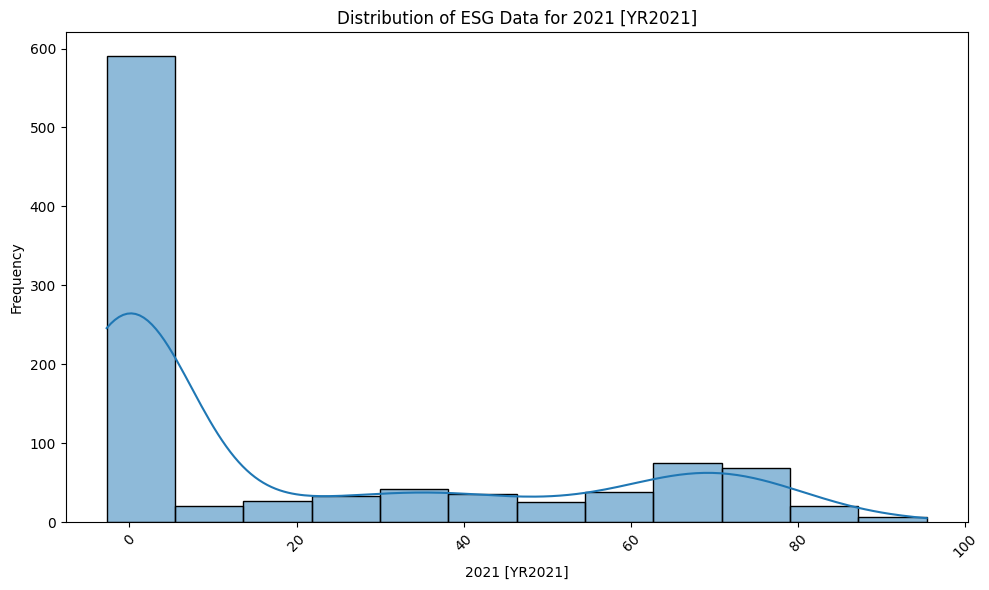

In [84]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your Excel file
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"

# Load the Excel file
df = pd.read_excel(file_path, engine="openpyxl")

# Drop missing and empty rows
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Function to plot distribution for any year column
def plot_column_distribution(df, column_name):
    # Convert to numeric, coercing errors (like "..") to NaN
    numeric_col = pd.to_numeric(df[column_name], errors='coerce')
    
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_col.dropna(), kde=True)
    plt.title(f'Distribution of ESG Data for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📊 Plot ESG distribution for multiple years
plot_column_distribution(df, '2020 [YR2020]')
plot_column_distribution(df, '2023 [YR2023]')
plot_column_distribution(df, '2022 [YR2022]')
plot_column_distribution(df, '2021 [YR2021]')





In [85]:
print(df.columns.tolist())


['Country Name', 'Country Code', 'Series Name', 'Series Code', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']


In [86]:
print(df['Series Name'].unique())


['CO2 emissions (metric tons per capita)'
 'Energy use (kg of oil equivalent per capita)'
 'Renewable energy consumption (% of total final energy consumption)'
 'Fossil fuel energy consumption (% of total)' 'Gini index'
 'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'Regulatory Quality: Estimate'
 'Political Stability and Absence of Violence/Terrorism: Estimate'
 'Voice and Accountability: Estimate' nan]


In [88]:
print("NaNs per feature before scaling:\n", X_cluster.isna().sum())


NaNs per feature before scaling:
 Series Name
NaN                                             241
CO2 emissions (metric tons per capita)            0
Energy use (kg of oil equivalent per capita)    241
dtype: int64


NaNs per feature before imputation:
 Series Name
CO2 emissions (metric tons per capita)            0
Energy use (kg of oil equivalent per capita)    241
Fossil fuel energy consumption (% of total)     241
dtype: int64
Any NaNs after imputation?: False


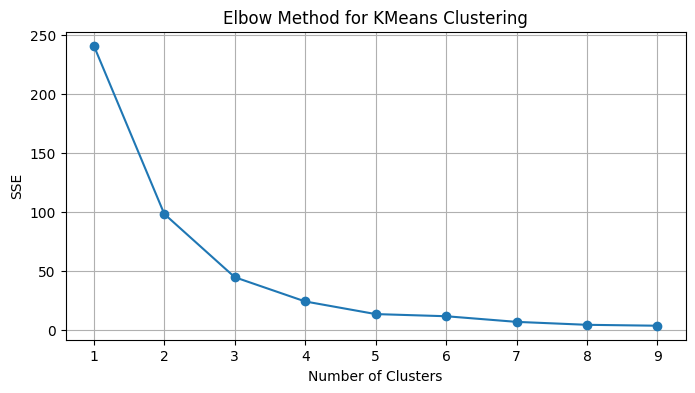

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Drop any column named 'NaN' if exists
if 'NaN' in df_pivot.columns:
    df_pivot = df_pivot.drop(columns=['NaN'])

# Select your 3 desired features explicitly (update if needed)
features_cluster = [
    'CO2 emissions (metric tons per capita)',
    'Energy use (kg of oil equivalent per capita)',
    'Fossil fuel energy consumption (% of total)'
]

# Check if all features exist
for feat in features_cluster:
    if feat not in df_pivot.columns:
        raise ValueError(f"Feature '{feat}' not found in df_pivot columns.")

# Extract features and convert to numeric
X_cluster = df_pivot[features_cluster].apply(pd.to_numeric, errors='coerce')

# Check NaNs before imputation
print("NaNs per feature before imputation:\n", X_cluster.isna().sum())

# Impute missing values with mean and scale
pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_scaled = pipeline.fit_transform(X_cluster)

# Check NaNs after imputation
print("Any NaNs after imputation?:", np.isnan(X_scaled).any())

# Elbow method to find optimal k
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for KMeans Clustering')
plt.grid(True)
plt.show()

# KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_pivot['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster plot removed
# You can add your own visualization later here once the data is confirmed
# Example placeholder:
# sns.scatterplot(x=X_cluster.iloc[:, 0], y=X_cluster.iloc[:, 1], hue=df_pivot['Cluster'], palette='Set2')
# plt.title('KMeans Clustering of Countries based on ESG Metrics')
# plt.xlabel(features_cluster[0])
# plt.ylabel(features_cluster[1])
# plt.tight_layout()
# plt.show()



In [90]:
print(df.columns)


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]',
       '2022 [YR2022]', '2023 [YR2023]'],
      dtype='object')


In [91]:
# STEP 1: Rename columns to remove '[YRxxxx]' and extract year only
df.columns = df.columns.str.replace(r'\s*\[YR\d+\]', '', regex=True)

# STEP 2: Melt the dataframe into long format
df_melted = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    var_name='Year',
    value_name='Value'
)

# STEP 3: Convert 'Year' to datetime format (or just integer)
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y')

# OPTIONAL: convert 'Value' to numeric
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

print(df_melted.head())


  Country Name Country Code  \
0        India          IND   
1        India          IND   
2        India          IND   
3        India          IND   
4        India          IND   

                                         Series Name        Series Code  \
0             CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
1       Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   
2  Renewable energy consumption (% of total final...     EG.FEC.RNEW.ZS   
3        Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   
4                                         Gini index        SI.POV.GINI   

        Year       Value  
0 2010-01-01    1.338034  
1 2010-01-01  558.786562  
2 2010-01-01   36.160000  
3 2010-01-01   71.404695  
4 2010-01-01         NaN  


In [94]:
!pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Processing: CO2 emissions (metric tons per capita)


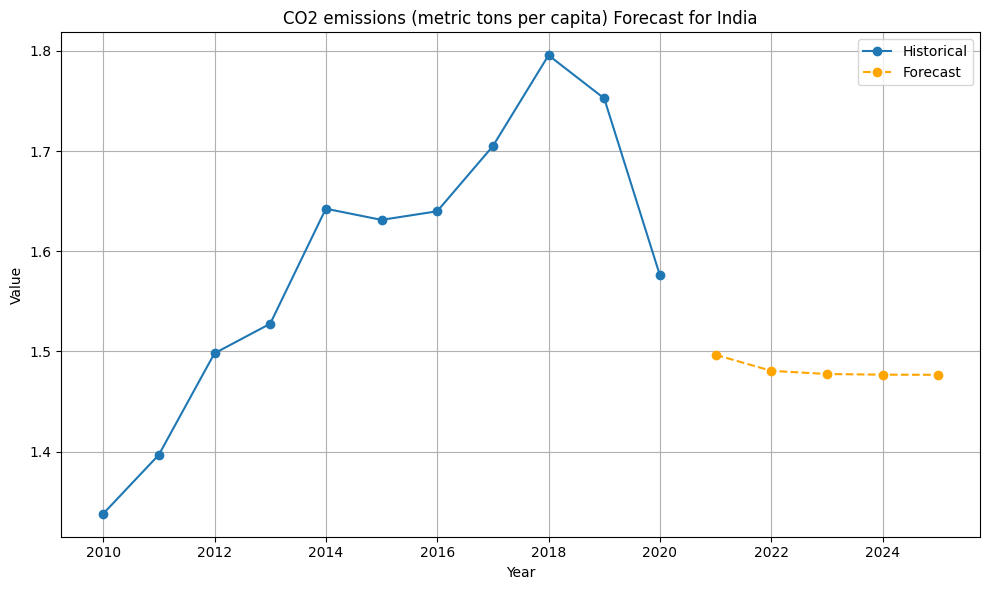

Processing: Energy use (kg of oil equivalent per capita)


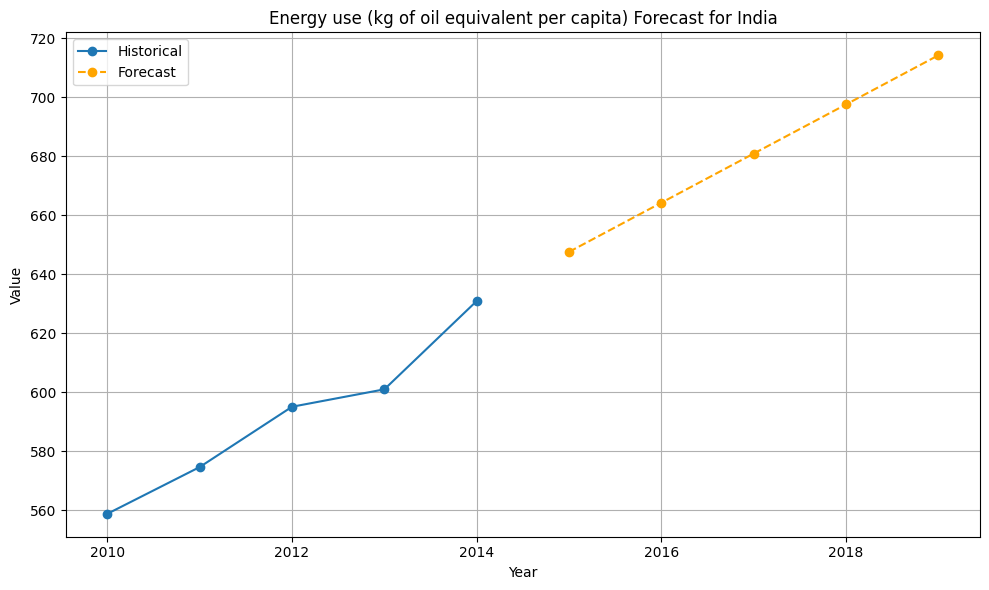

Processing: Renewable energy consumption (% of total final energy consumption)


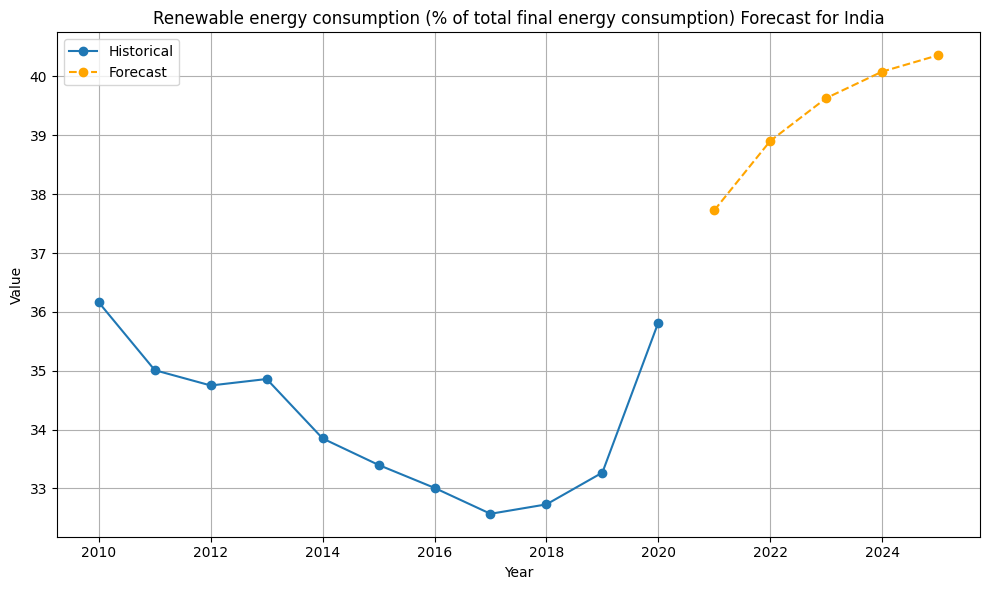

Processing: Fossil fuel energy consumption (% of total)


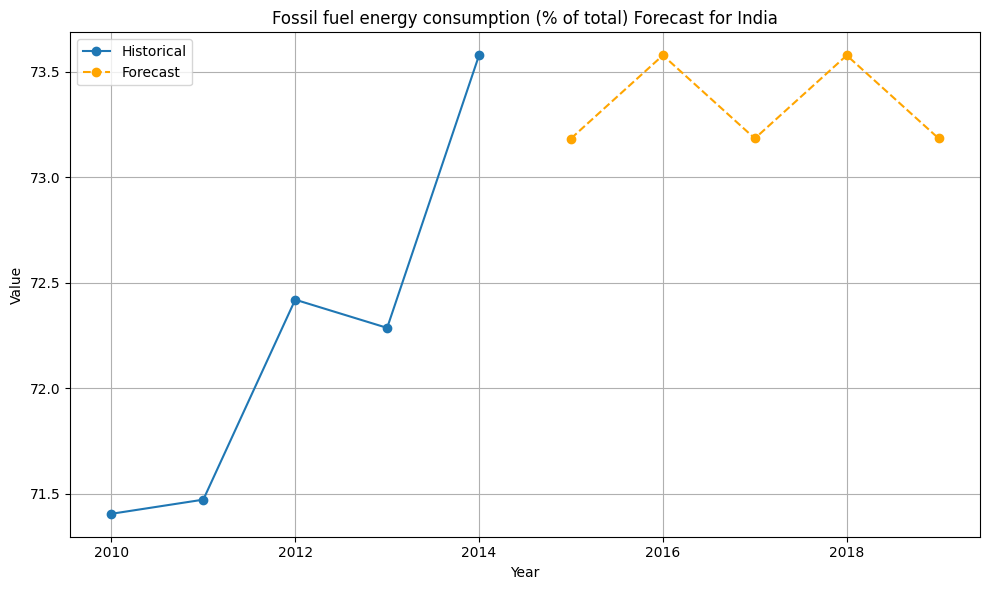

Processing: Gini index


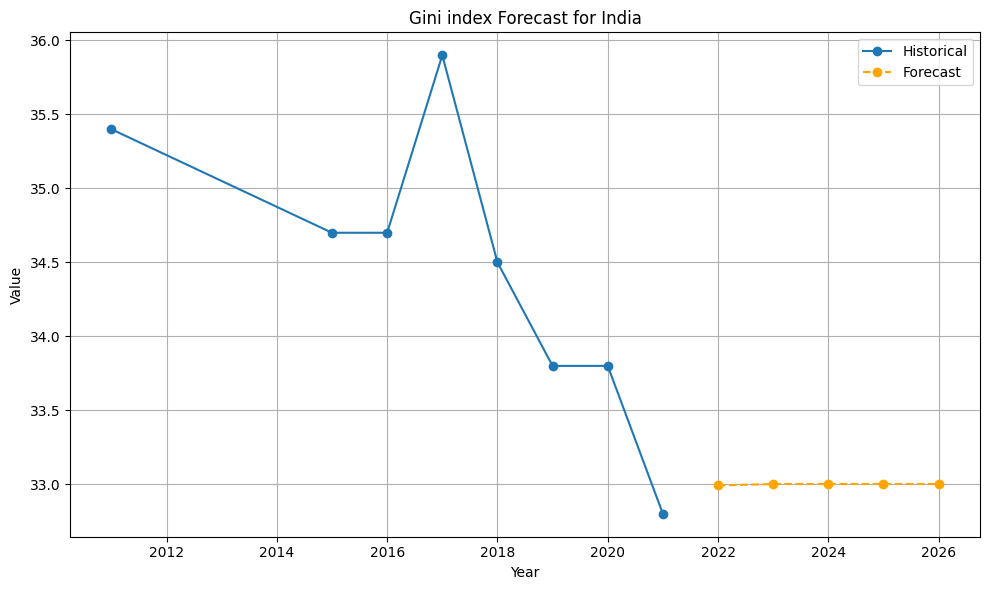

Processing: Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)


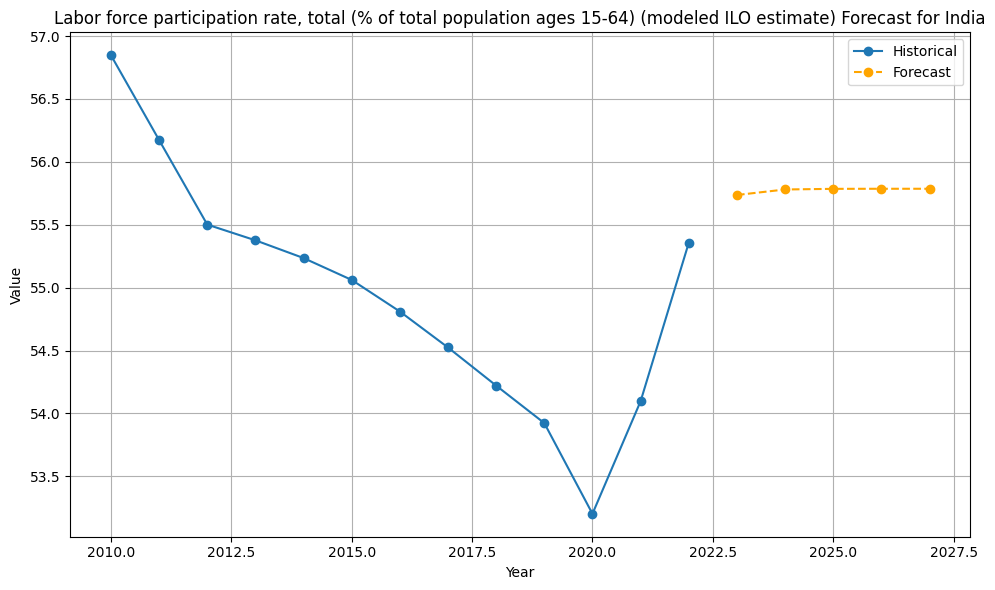

Processing: Poverty headcount ratio at national poverty lines (% of population)
Skipping Poverty headcount ratio at national poverty lines (% of population) due to insufficient data points

Processing: Regulatory Quality: Estimate


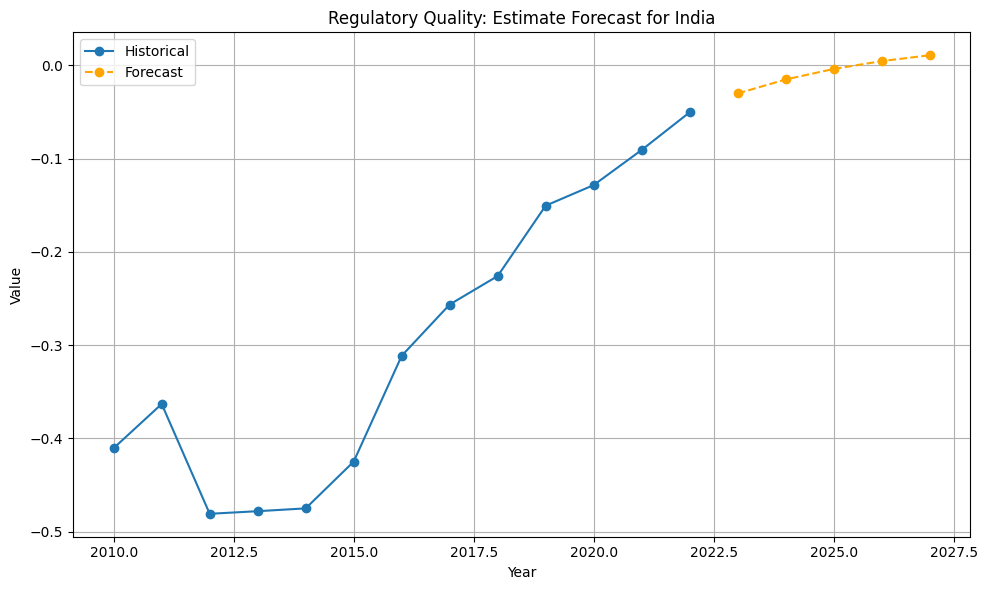

Processing: Political Stability and Absence of Violence/Terrorism: Estimate


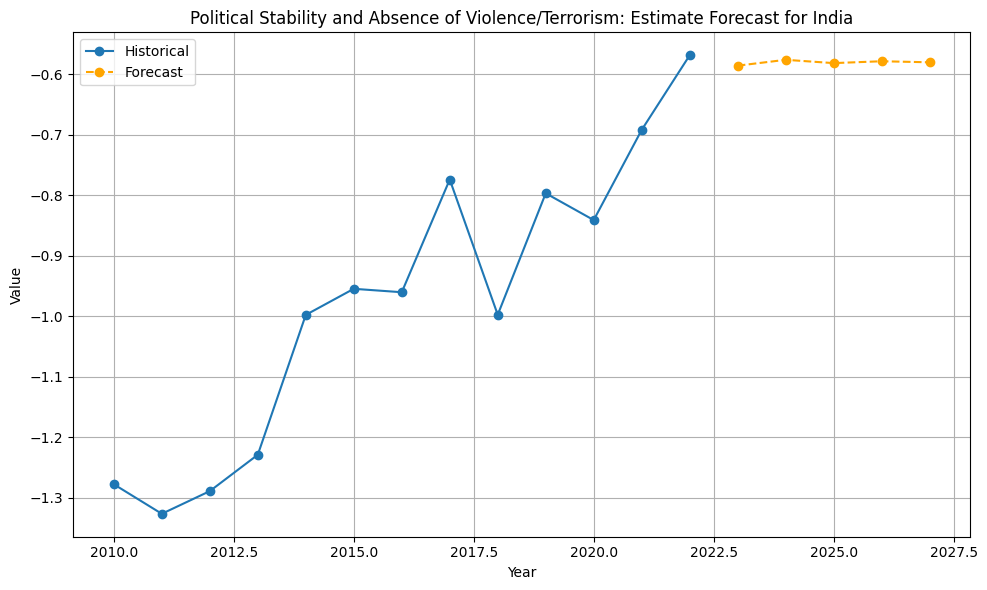

Processing: Voice and Accountability: Estimate


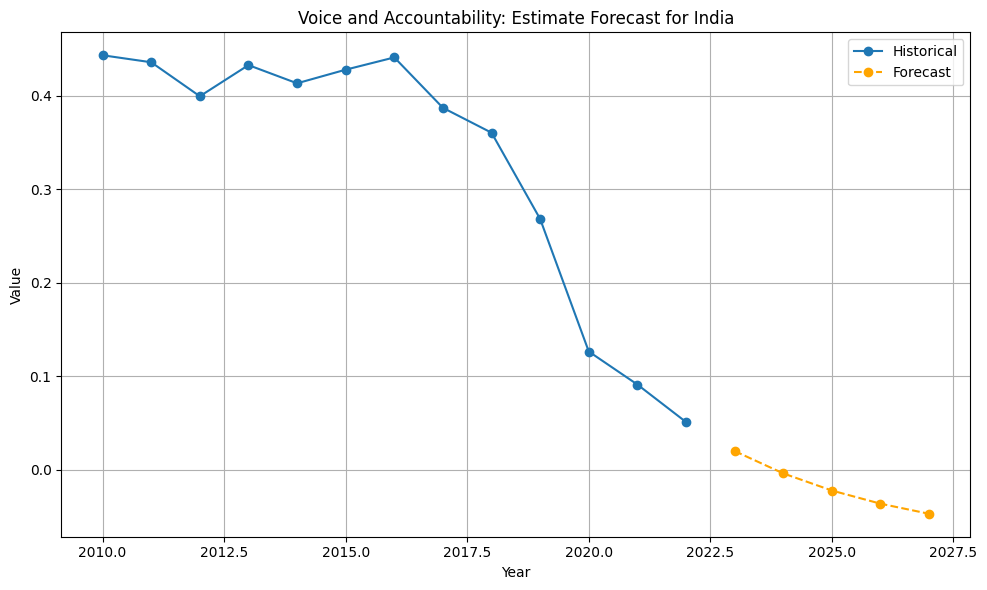

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Path to your Excel file
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"

# Load the Excel file
df = pd.read_excel(file_path, engine="openpyxl")

# Drop missing and empty rows/columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Identify year columns
year_cols = [col for col in df.columns if '[YR' in col]
df[year_cols] = df[year_cols].replace('..', np.nan)

# Focus on one country (India)
country = 'India'
india_df = df[df['Country Name'] == country]

# Loop through all unique indicators for India
for indicator in india_df['Series Name'].unique():
    print(f"Processing: {indicator}")
    
    subset = india_df[india_df['Series Name'] == indicator]
    
    # Skip if data is missing or very short
    if subset.empty or subset[year_cols].isnull().all(axis=1).values[0]:
        print(f"Skipping {indicator} due to missing data\n")
        continue

    # Build time series
    ts_values = subset[year_cols].iloc[0].astype(float)
    ts = pd.DataFrame({
        'Year': [int(col.split()[0]) for col in year_cols],
        'Value': ts_values.values
    }).dropna()

    # Skip if too little data for ARIMA
    if len(ts) < 5:
        print(f"Skipping {indicator} due to insufficient data points\n")
        continue

    #  Fit ARIMA model
    try:
        model = ARIMA(ts['Value'], order=(1, 1, 1))
        fitted_model = model.fit()

        # 🔮 Forecast
        forecast_steps = 5
        forecast = fitted_model.forecast(steps=forecast_steps)
        future_years = list(range(ts['Year'].max() + 1, ts['Year'].max() + 1 + forecast_steps))

        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(ts['Year'], ts['Value'], label='Historical', marker='o')
        plt.plot(future_years, forecast, label='Forecast', linestyle='--', marker='o', color='orange')
        plt.title(f'{indicator} Forecast for {country}')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {indicator}: {e}\n")


In [97]:
wide_df = pivoted_data.pivot_table(index=['Country Name', 'Year'],
                                   columns='Series Name', values='Value').reset_index()


In [98]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Path to your Excel file
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"

# Load the Excel file
df = pd.read_excel(file_path, engine="openpyxl")

# Drop rows/columns that are completely empty
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Identify year columns (those containing '[YR')
year_cols = [col for col in df.columns if '[YR' in col]

# Replace missing values represented as '..' with np.nan
df[year_cols] = df[year_cols].replace('..', np.nan)

#  Focus on one country (e.g., India)
country = 'India'
country_df = df[df['Country Name'] == country]

# --- Step 1: Pivot data from long to wide format ---
# Pivot so rows = country + year, columns = indicators, values = data

# First, melt the year columns to long format for easier pivot
melted = country_df.melt(
    id_vars=['Country Name', 'Series Name'], 
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' column (extract year number from strings like '1990 [YR1990]')
melted['Year'] = melted['Year'].str.extract(r'(\d{4})').astype(int)

# Drop rows with missing values
melted = melted.dropna(subset=['Value'])

# Pivot: index = ['Country Name', 'Year'], columns = 'Series Name', values = 'Value'
pivot_df = melted.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Convert all indicator columns to numeric (they might be object if mixed)
pivot_df.iloc[:, 2:] = pivot_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# --- Step 2: Handle missing values ---
# For simplicity, fill missing indicator values with median of each column
pivot_df.fillna(pivot_df.median(numeric_only=True), inplace=True)

# --- Step 3: Prepare features and target ---
# Set your target variable, for example 'CO2 emissions (metric tons per capita)'
target_variable = 'CO2 emissions (metric tons per capita)'

# Filter rows where target is present
pivot_df = pivot_df.dropna(subset=[target_variable])

X = pivot_df.drop(columns=['Country Name', 'Year', target_variable])
y = pivot_df[target_variable]

# --- Step 4: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train models ---

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# --- Step 6: Evaluate models ---
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -- MSE: {mse:.4f}, R2 Score: {r2:.4f}")

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_xgb, 'XGBoost')


Linear Regression -- MSE: 0.0304, R2 Score: -0.0024
Random Forest -- MSE: 0.0080, R2 Score: 0.7367
XGBoost -- MSE: 0.0039, R2 Score: 0.8713


In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Path to your Excel file
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"

# Load the Excel file
df = pd.read_excel(file_path, engine="openpyxl")

# Drop rows/columns that are completely empty
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Identify year columns (those containing '[YR')
year_cols = [col for col in df.columns if '[YR' in col]

# Replace missing values represented as '..' with np.nan
df[year_cols] = df[year_cols].replace('..', np.nan)

# Focus on one country (e.g., India)
country = 'India'
country_df = df[df['Country Name'] == country]

# --- Step 1: Pivot data from long to wide format ---
# Melt the year columns to long format
melted = country_df.melt(
    id_vars=['Country Name', 'Series Name'], 
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Extract year number from 'Year' column
melted['Year'] = melted['Year'].str.extract(r'(\d{4})').astype(int)

# Drop missing values
melted = melted.dropna(subset=['Value'])

# Pivot so rows = country + year, columns = indicators
pivot_df = melted.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Convert indicator columns to numeric
pivot_df.iloc[:, 2:] = pivot_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# --- Step 2: Handle missing values ---
# Fill missing indicator values with median of each column
pivot_df.fillna(pivot_df.median(numeric_only=True), inplace=True)

# --- Step 3: Prepare features and target ---
# Set your target variable here exactly as it appears in your data
target_variable = 'CO2 emissions (metric tons per capita)'

# Drop rows missing target variable
pivot_df = pivot_df.dropna(subset=[target_variable])

X = pivot_df.drop(columns=['Country Name', 'Year', target_variable])
y = pivot_df[target_variable]

# --- Step 4: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train models ---

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Step 6: Define evaluation function ---

def evaluate_regression(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Evaluation metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print()

# --- Step 7: Evaluate models ---

evaluate_regression(y_test, y_pred_lr, "Linear Regression")
evaluate_regression(y_test, y_pred_rf, "Random Forest")
evaluate_regression(y_test, y_pred_rf, "XGBoost")


Evaluation metrics for Linear Regression:
  Mean Squared Error (MSE): 0.0304
  Root Mean Squared Error (RMSE): 0.1742
  Mean Absolute Error (MAE): 0.1351
  R-squared (R2): -0.0024

Evaluation metrics for Random Forest:
  Mean Squared Error (MSE): 0.0080
  Root Mean Squared Error (RMSE): 0.0893
  Mean Absolute Error (MAE): 0.0815
  R-squared (R2): 0.7367

Evaluation metrics for XGBoost:
  Mean Squared Error (MSE): 0.0080
  Root Mean Squared Error (RMSE): 0.0893
  Mean Absolute Error (MAE): 0.0815
  R-squared (R2): 0.7367




--- Clustering for year: 2019 ---
KMeans cluster counts:
KMeans_Cluster
3    103
2     56
0     53
1     27
Name: count, dtype: int64

DBSCAN cluster counts:
DBSCAN_Cluster
 1    172
-1     57
 3      4
 0      3
 2      3
Name: count, dtype: int64


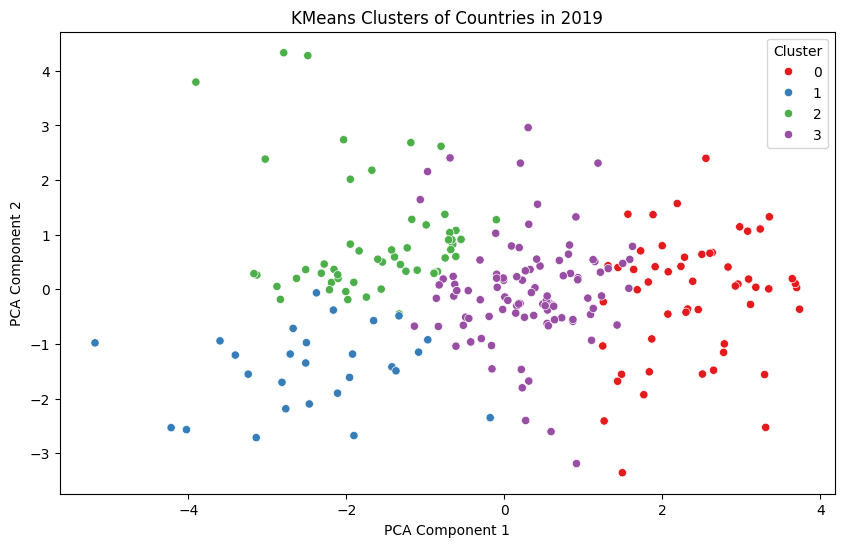

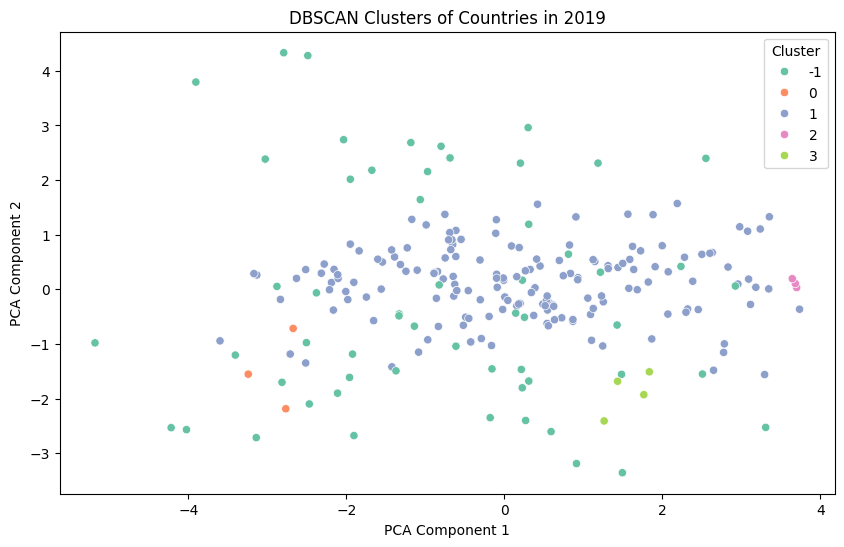


--- Clustering for year: 2020 ---
KMeans cluster counts:
KMeans_Cluster
1    113
3     64
0     47
2     15
Name: count, dtype: int64

DBSCAN cluster counts:
DBSCAN_Cluster
 0    185
-1     43
 3      4
 2      4
 1      3
Name: count, dtype: int64


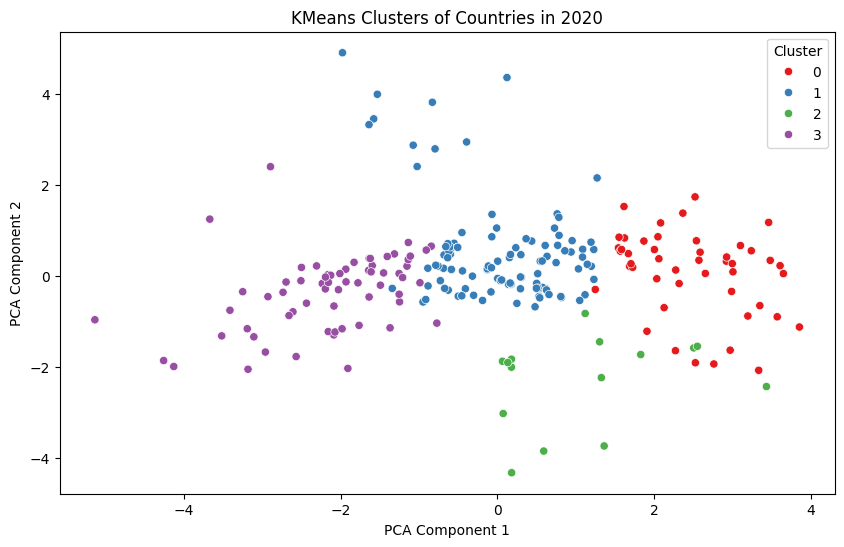

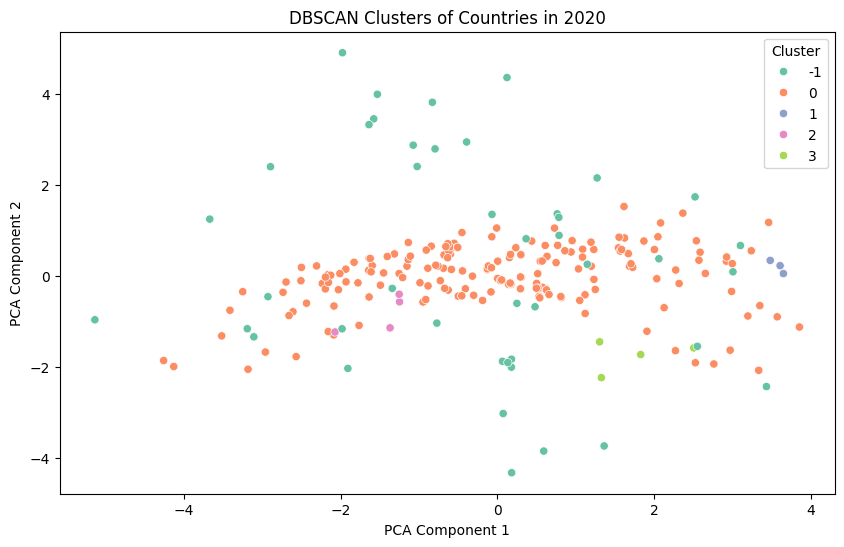


--- Clustering for year: 2021 ---
KMeans cluster counts:
KMeans_Cluster
2    120
0     63
3     43
1     13
Name: count, dtype: int64

DBSCAN cluster counts:
DBSCAN_Cluster
 0    214
-1     22
 1      3
Name: count, dtype: int64


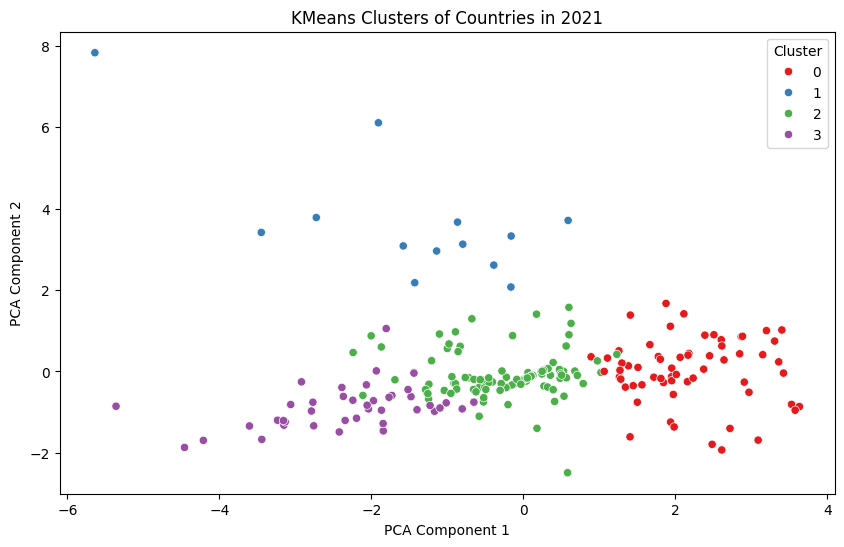

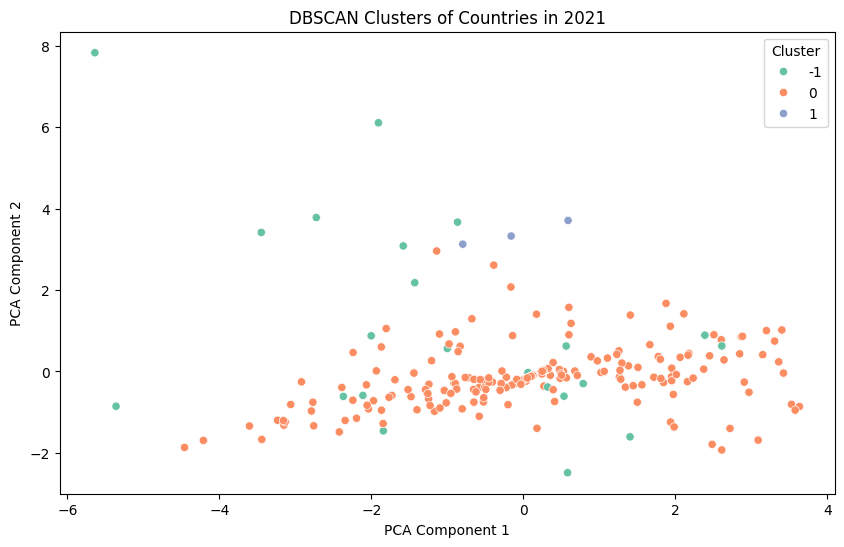


--- Clustering for year: 2022 ---
KMeans cluster counts:
KMeans_Cluster
3    122
0     67
2     45
1      5
Name: count, dtype: int64

DBSCAN cluster counts:
DBSCAN_Cluster
 0    216
-1     23
Name: count, dtype: int64


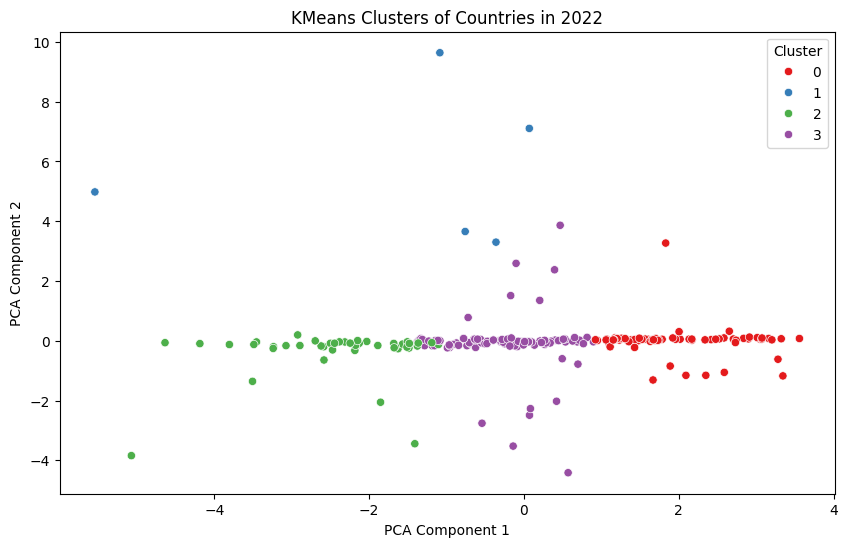

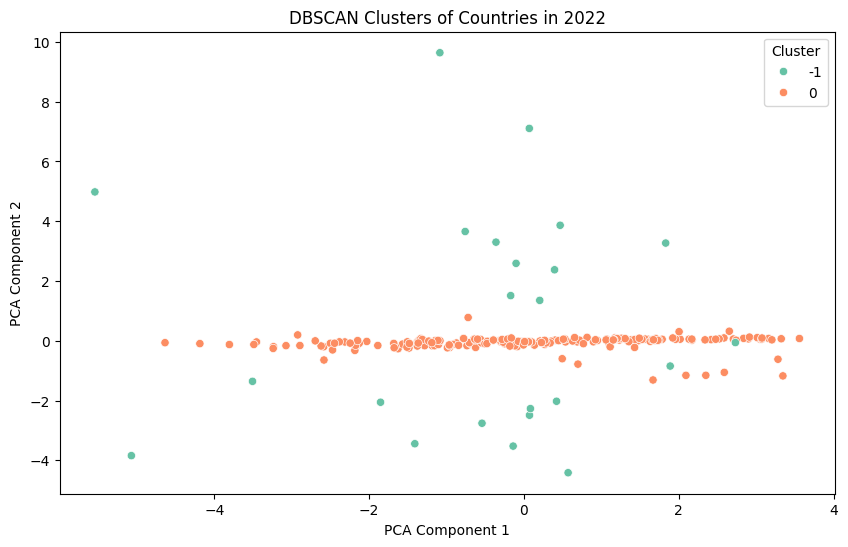

In [77]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Path to your Excel file
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"

# 📥 Load the Excel file
df = pd.read_excel(file_path, engine="openpyxl")

# 🧹 Drop empty rows/columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# 🔍 Identify year columns
year_cols = [col for col in df.columns if '[YR' in col]
df[year_cols] = df[year_cols].replace('..', np.nan)

# Melt data to long format
melted = df.melt(
    id_vars=['Country Name', 'Series Name'], 
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Extract year number as int
melted['Year'] = melted['Year'].str.extract(r'(\d{4})').astype(int)

# Drop missing values
melted = melted.dropna(subset=['Value'])

# Pivot: rows = Country + Year, columns = indicators
pivot_df = melted.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Convert indicator columns to numeric
pivot_df.iloc[:, 2:] = pivot_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Function to perform clustering per year
def cluster_for_year(year, pivot_df):
    print(f"\n--- Clustering for year: {year} ---")
    
    data_year = pivot_df[pivot_df['Year'] == year].copy()
    if data_year.empty:
        print(f"No data available for year {year}, skipping.")
        return
    
    features = data_year.drop(columns=['Country Name', 'Year'])
    
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    features_imputed = imputer.fit_transform(features)
    
    # Scale features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_imputed)
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(features_scaled)
    data_year['KMeans_Cluster'] = kmeans_labels
    
    # DBSCAN clustering
    dbscan = DBSCAN(eps=1.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(features_scaled)
    data_year['DBSCAN_Cluster'] = dbscan_labels
    
    # Print cluster counts
    print("KMeans cluster counts:")
    print(data_year['KMeans_Cluster'].value_counts())
    
    print("\nDBSCAN cluster counts:")
    print(data_year['DBSCAN_Cluster'].value_counts())
    
    # PCA for visualization
    pca = PCA(n_components=2)
    components = pca.fit_transform(features_scaled)
    
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=components[:,0], y=components[:,1], hue=kmeans_labels, palette='Set1')
    plt.title(f"KMeans Clusters of Countries in {year}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.scatterplot(x=components[:,0], y=components[:,1], hue=dbscan_labels, palette='Set2')
    plt.title(f"DBSCAN Clusters of Countries in {year}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster')
    plt.show()

# Loop through years 2019 to 2022
for year in range(2019, 2023):
    cluster_for_year(year, pivot_df)


In [102]:
print(data_year.columns)


Index(['Country Name', 'Year', 'CO2 emissions (metric tons per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Fossil fuel energy consumption (% of total)', 'Gini index',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Regulatory Quality: Estimate',
       'Renewable energy consumption (% of total final energy consumption)',
       'Voice and Accountability: Estimate'],
      dtype='object', name='Series Name')


In [83]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
file_path = r"C:\Users\shrav\OneDrive\Desktop\sustainable-supply-chains-esg-analysis\data\P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data (1).xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Drop empty rows/columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Identify year columns
year_cols = [col for col in df.columns if '[YR' in col]
df[year_cols] = df[year_cols].replace('..', np.nan)

# Melt to long format
melted = df.melt(
    id_vars=['Country Name', 'Series Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Extract year as int
melted['Year'] = melted['Year'].str.extract(r'(\d{4})').astype(int)

# Drop missing values
melted = melted.dropna(subset=['Value'])

# Pivot data: rows = Country + Year, columns = indicators
pivot_df = melted.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Convert indicator columns to numeric
pivot_df.iloc[:, 2:] = pivot_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# CO2 emission column name (from your dataset)
co2_col = 'CO2 emissions (metric tons per capita)'

# Function to run classification per year
def classify_year(year, df):
    print(f"\n--- Classification for year {year} ---")
    data_year = df[df['Year'] == year].copy()
    
    if data_year.empty:
        print(f"No data available for year {year}. Skipping.")
        return
    
    # Drop rows missing CO2 emissions
    data_year = data_year.dropna(subset=[co2_col])
    if data_year.empty:
        print(f"No CO2 data for year {year}. Skipping.")
        return
    
    # Create binary label: High CO2 = 1 if CO2 > median, else 0
    threshold = data_year[co2_col].median()
    data_year['High_CO2'] = (data_year[co2_col] > threshold).astype(int)
    
    # Features (drop Country, Year, CO2, and label)
    X = data_year.drop(columns=['Country Name', 'Year', co2_col, 'High_CO2'])
    y = data_year['High_CO2']
    
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y)
    
    # Train logistic regression
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# Run classification for all years 2019-2022
for yr in range(2019, 2023):
    classify_year(yr, pivot_df)



--- Classification for year 2019 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        36
           1       0.77      0.83      0.80        36

    accuracy                           0.79        72
   macro avg       0.79      0.79      0.79        72
weighted avg       0.79      0.79      0.79        72

Confusion Matrix:
[[27  9]
 [ 6 30]]

--- Classification for year 2020 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.79      0.83      0.81        36

    accuracy                           0.81        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.81      0.81      0.81        72

Confusion Matrix:
[[28  8]
 [ 6 30]]

--- Classification for year 2021 ---
No CO2 data for year 2021. Skipping.

--- Classification for year 2022 ---
No CO2 data for year 2022. Skipping.
